# Support Vector Machines Assignment

### Data Set - Forest_fires

# 1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# 3. Data Understanding

## 3.1 Initial Analysis :

In [3]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest_data.shape

(517, 31)

In [5]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [9]:
forest_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
forest_data_1 = forest_data.drop(['month','day'],axis = 1)
forest_data_1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


## 3.2 Correlation Matrix :

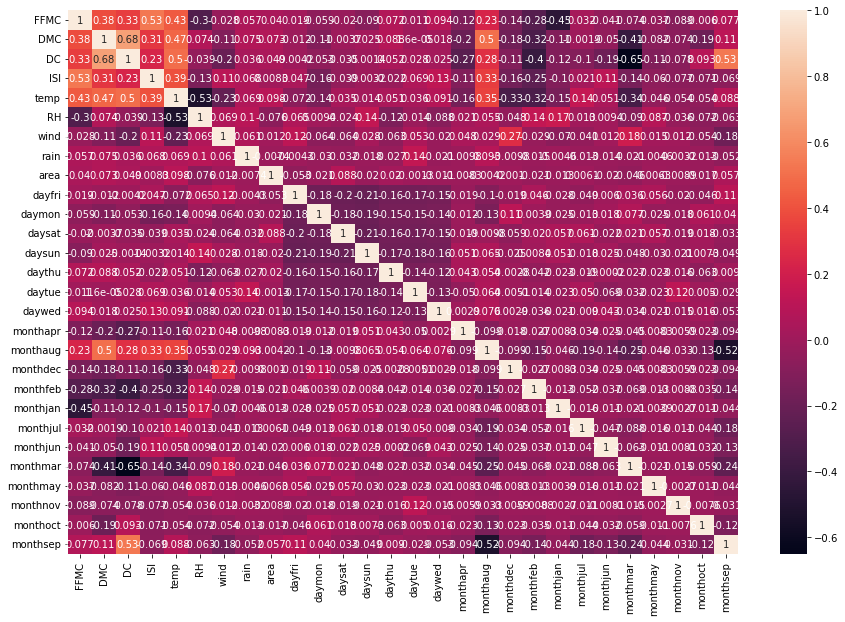

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(forest_data_1.corr(),annot = True)
plt.show()

## 3.3 Visualization using distplot :

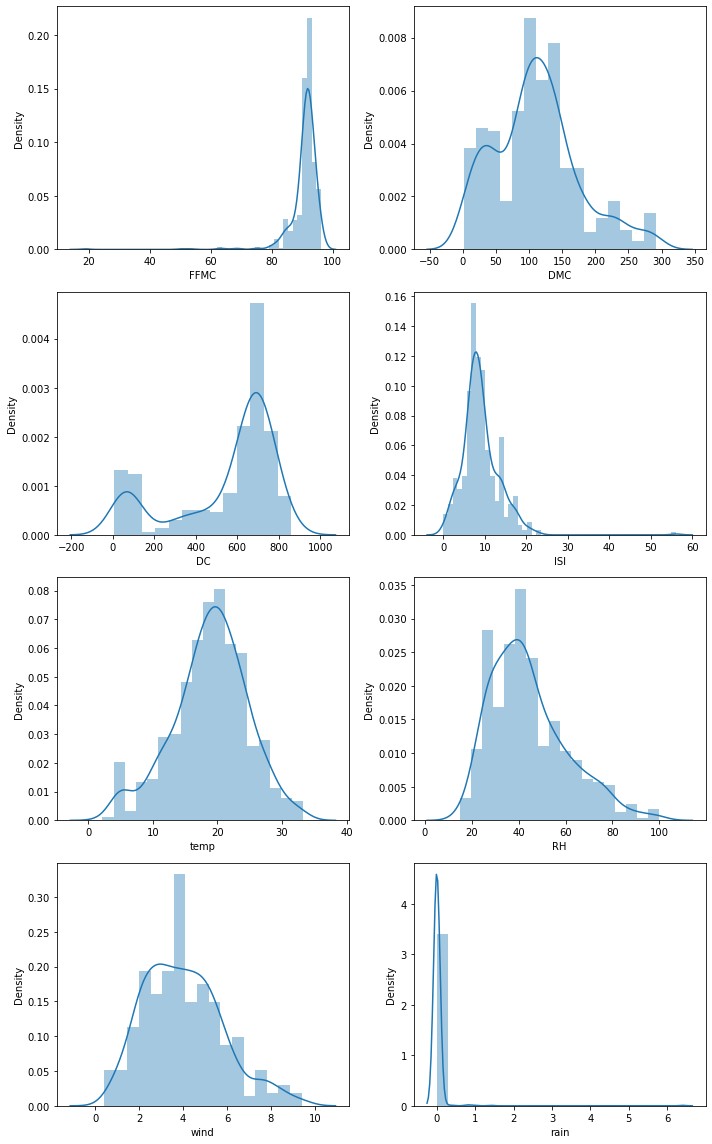

In [12]:
fig, ax = plt.subplots(4,2, figsize = (10,16))

sns.distplot(forest_data_1.FFMC, ax = ax[0,0])
sns.distplot(forest_data_1.DMC, ax = ax[0,1])
sns.distplot(forest_data_1.DC, ax = ax[1,0])
sns.distplot(forest_data_1.ISI, ax = ax[1,1])
sns.distplot(forest_data_1.temp, ax = ax[2,0])
sns.distplot(forest_data_1.RH, ax = ax[2,1])
sns.distplot(forest_data_1.wind, ax = ax[3,0])
sns.distplot(forest_data_1.rain, ax = ax[3,1])

plt.tight_layout()
plt.show()

## 3.4 Checking of the outlier :

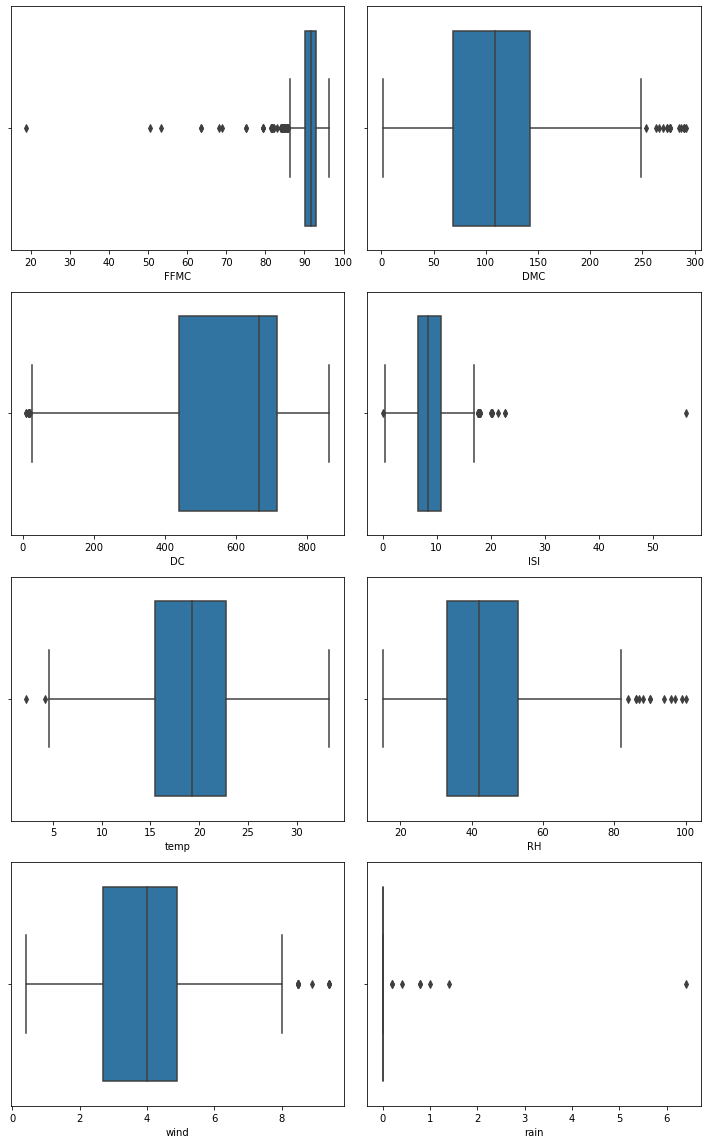

In [13]:
fig, ax = plt.subplots(4,2, figsize = (10,16))

sns.boxplot(forest_data_1.FFMC, ax = ax[0,0])
sns.boxplot(forest_data_1.DMC, ax = ax[0,1])
sns.boxplot(forest_data_1.DC, ax = ax[1,0])
sns.boxplot(forest_data_1.ISI, ax = ax[1,1])
sns.boxplot(forest_data_1.temp, ax = ax[2,0])
sns.boxplot(forest_data_1.RH, ax = ax[2,1])
sns.boxplot(forest_data_1.wind, ax = ax[3,0])
sns.boxplot(forest_data_1.rain, ax = ax[3,1])

plt.tight_layout()
plt.show()

# 4. Extrating the independent and dependent variables

In [14]:
x = forest_data_1.iloc[:,0:28]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = forest_data_1['size_category']
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

## 4.1 Data Splitting :

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

# 5. Appling Grid search for best 'C' or 'Gamma' value

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [19]:
clf = SVC()

In [20]:
param_grid = [{'kernel':['rbf'],'gamma':[10,0.5,0.1],'C':[10,0.1,0.001] }]

gsv = GridSearchCV(clf,param_grid,cv = 10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001], 'gamma': [10, 0.5, 0.1],
                          'kernel': ['rbf']}])

In [21]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7340840840840841)

# 6. SVM with Kernel rbf

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [23]:
clf = SVC(kernel = 'rbf',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

In [24]:
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy For Kernal rbf :', acc)

Accuracy For Kernal rbf : 75.0


In [25]:
confusion_matrix(y_test, y_pred)

array([[  0,  39],
       [  0, 117]], dtype=int64)

# 7. SVM with Kernel linear

In [26]:
clf = SVC(kernel = 'linear',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

In [27]:
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy For Kernal Linear :', acc)

Accuracy For Kernal Linear : 99.35897435897436


In [28]:
confusion_matrix(y_test, y_pred)

array([[ 39,   0],
       [  1, 116]], dtype=int64)

# 8. SVM with Kernel poly

In [29]:
clf = SVC(kernel = 'poly',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

In [30]:
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy For Kernal Poly :', acc)

Accuracy For Kernal Poly : 98.07692307692307


In [31]:
confusion_matrix(y_test, y_pred)

array([[ 37,   2],
       [  1, 116]], dtype=int64)

# 9. SVM with Kernel sigmoid

In [32]:
clf = SVC(kernel = 'sigmoid',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

In [33]:
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy For Kernal Sigmoid :', acc)

Accuracy For Kernal Sigmoid : 75.0


In [34]:
confusion_matrix(y_test, y_pred)

array([[  0,  39],
       [  0, 117]], dtype=int64)

#### 

## Conclusion :
    
    The Accuracy Model For Kernal rbf     : 75%
    The Accuracy Model For Kernal Linear  : 99.35%
    The Accuracy Model For Kernal Poly    : 98.07%
    The Accuracy Model For Kernal Sigmoid : 75.0%

### SVM with Kernel Linear have the Best Model Accuracy with 99.3%